In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(f"shape of train images = {x_train.shape}")
print(f"shape of train labels = {y_train.shape}")
print(f"shape of test images = {x_test.shape}")
print(f"shape of test labels = {y_test.shape}")

shape of train images = (60000, 28, 28)
shape of train labels = (60000,)
shape of test images = (10000, 28, 28)
shape of test labels = (10000,)


<function matplotlib.pyplot.show>

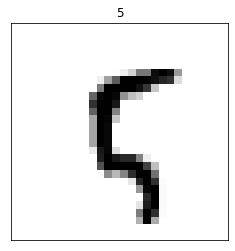

In [ ]:
plt.imshow(x_train[100], cmap="gray_r")
plt.title(y_train[100])
plt.xticks([])
plt.yticks([])
plt.show

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
model = tf.keras.Sequential([
     tf.keras.Input(shape= (28, 28, 1)),
     tf.keras.layers.Conv2D(filters=28, kernel_size=(5,5), activation='relu'), 
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     tf.keras.layers.Conv2D(filters=56, kernel_size=(3,3), activation='relu'),
     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
     
    
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 28)        728       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                89664     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
model.compile(
    #optimizer= tf.keras.optimizers.Adam(),
    optimizer= tf.keras.optimizers.SGD(),
    #optimizer= tf.keras.optimizers.RMSprop(), 
    loss= tf.keras.losses.sparse_categorical_crossentropy, 
    metrics=['accuracy']
)

In [ ]:
model.fit(x=x_train, y=y_train, epochs=12, validation_split=0.2, batch_size=32)

Epoch 1/12
1500/1500 [==============================] - 7s 5ms/step - loss: 8.0994e-04 - accuracy: 0.9997 - val_loss: 0.0115 - val_accuracy: 0.9973
Epoch 2/12
1500/1500 [==============================] - 7s 5ms/step - loss: 2.4048e-04 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9973
Epoch 3/12
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3834e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9973
Epoch 4/12
1500/1500 [==============================] - 7s 5ms/step - loss: 1.0804e-04 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9973
Epoch 5/12
1500/1500 [==============================] - 7s 5ms/step - loss: 9.2430e-05 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9973
Epoch 6/12
1500/1500 [==============================] - 7s 5ms/step - loss: 8.1351e-05 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9974
Epoch 7/12
1500/1500 [==============================] - 7s 5ms/step - loss: 7.3533e-05 - accuracy: 1.0000 - val_

In [ ]:
x_test = x_test.reshape(-1, 28, 28, 1)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_accuracy)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.9928

Test Accuracy: 0.9927999973297119

Test Loss: 0.04690428823232651
